<a href="https://colab.research.google.com/github/evvvsss/machine_learning_hw/blob/main/hw2_evseeva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Датасет: https://www.kaggle.com/competitions/titanic

Задачи:
А. Решение задачи классификации
1. Построить модель линейной классификации. При решении задачи методом
градиентного спуска, необходимо вычислить градиент с помощью матрицы
признаков.
2. Построить модель на основе случайного леса классифицирующих деревьев.
Определить параметры классификатора (количество деревьев, максимальная
глубина дерева), при которых точность классификации максимальна.
Б. Анализ ROC/PR-кривых
1. Рассмотреть простейшую задачу двухклассовой классификации, в которой элементы выборки имеют нормальное распределение с дисперсией 1 и средними значениями +𝝁 для экземпляров одного класса и -𝝁 для экземпляров другого класса. Экземпляры каждого класса появляются в обучающей выборке с вероятностью 1⁄2. Для данной задачи необходимо определить оптимальный классификатор, а также построить ROC-кривую для различных значений 𝝁.
2. Для двух моделей, полученных в п.А., построить ROC и PR (precision-recall) кривые. Получить значения площадей под этими кривыми. Какая метрика (ROC-AUC или PR-AUC) является более предпочтительной в данном примере и почему?

In [134]:
import pandas as pd


data = pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Атрибуты:

survival	Survival	0 = No, 1 = Yes

pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex
age	Age in years
sibsp	# of siblings / spouses aboard the Titanic
parch	# of parents / children aboard the Titanic
ticket	Ticket number
fare	Passenger fare
cabin	Cabin number
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [119]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [120]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [136]:
# столбцы с билетом, кабиной, и id никак не характеризуют человека (не влияют на выживаемость)
data.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [103]:
data.duplicated().sum()

0

<Axes: >

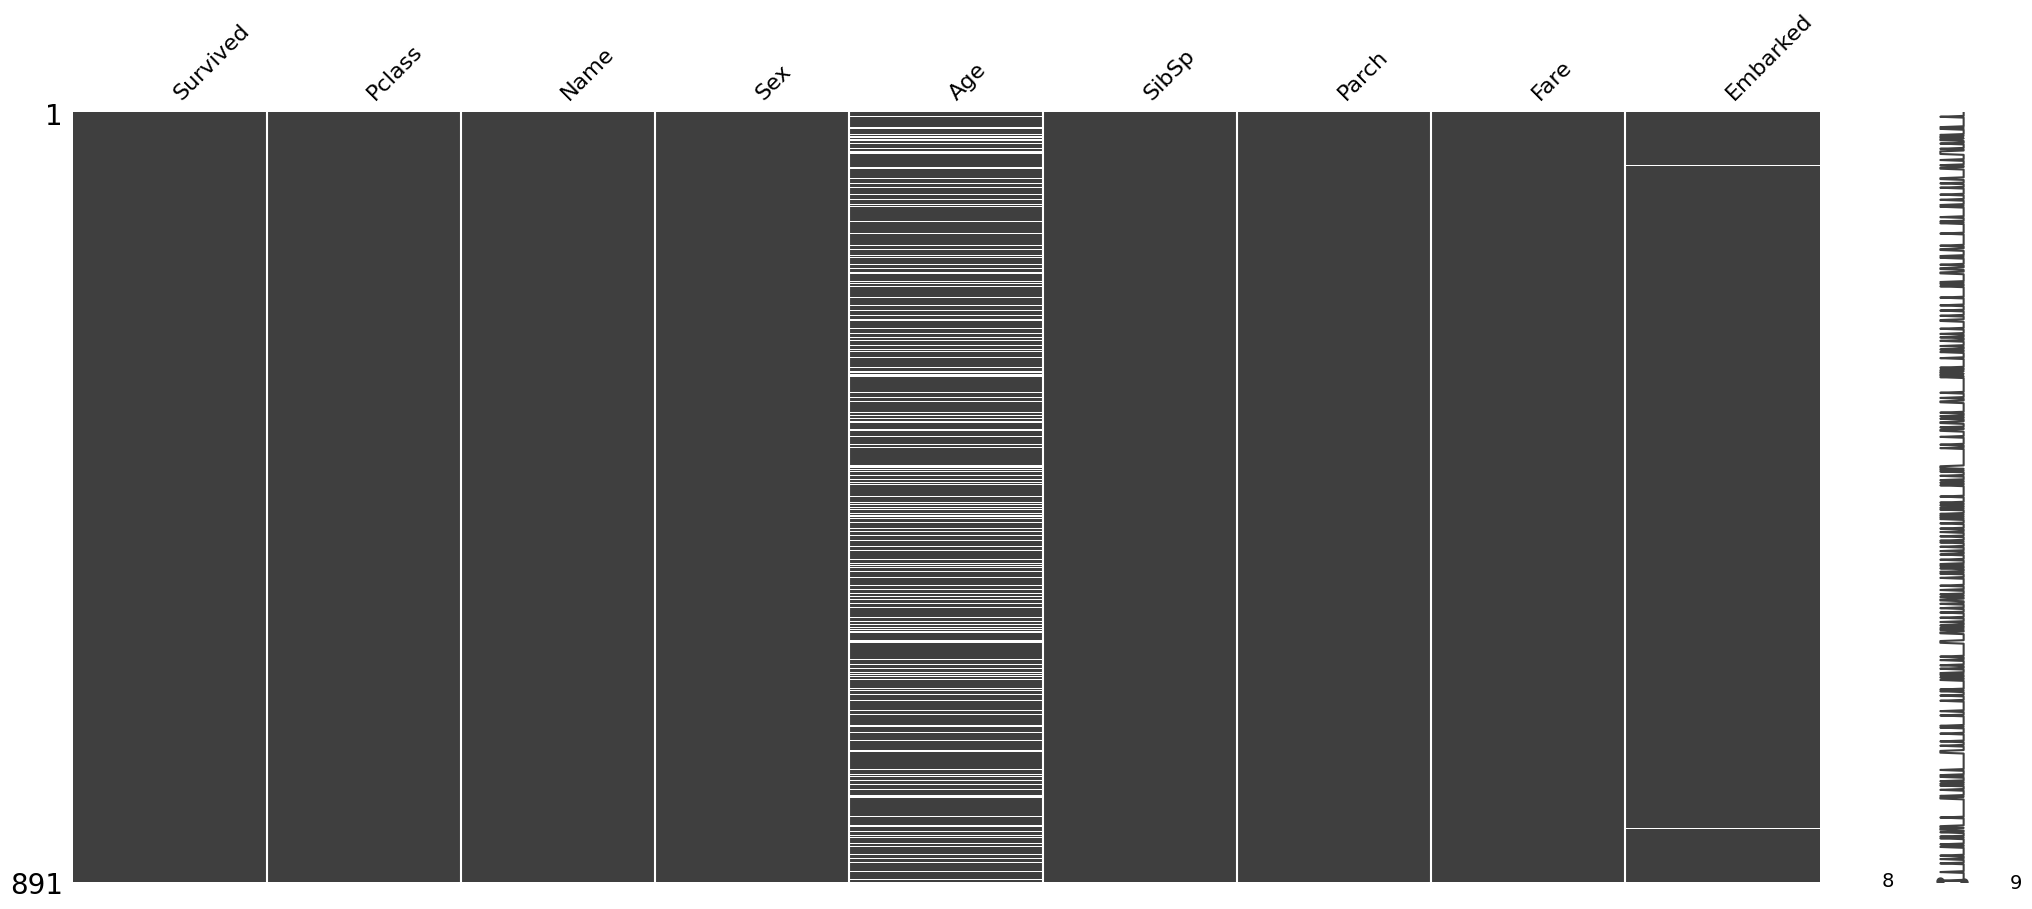

In [137]:
import missingno as msno
# пропущенные значения
msno.matrix(data)

In [138]:
data["Age"] = data["Age"].fillna(0)
data = data.fillna({"Embarked": "S"})

<Axes: >

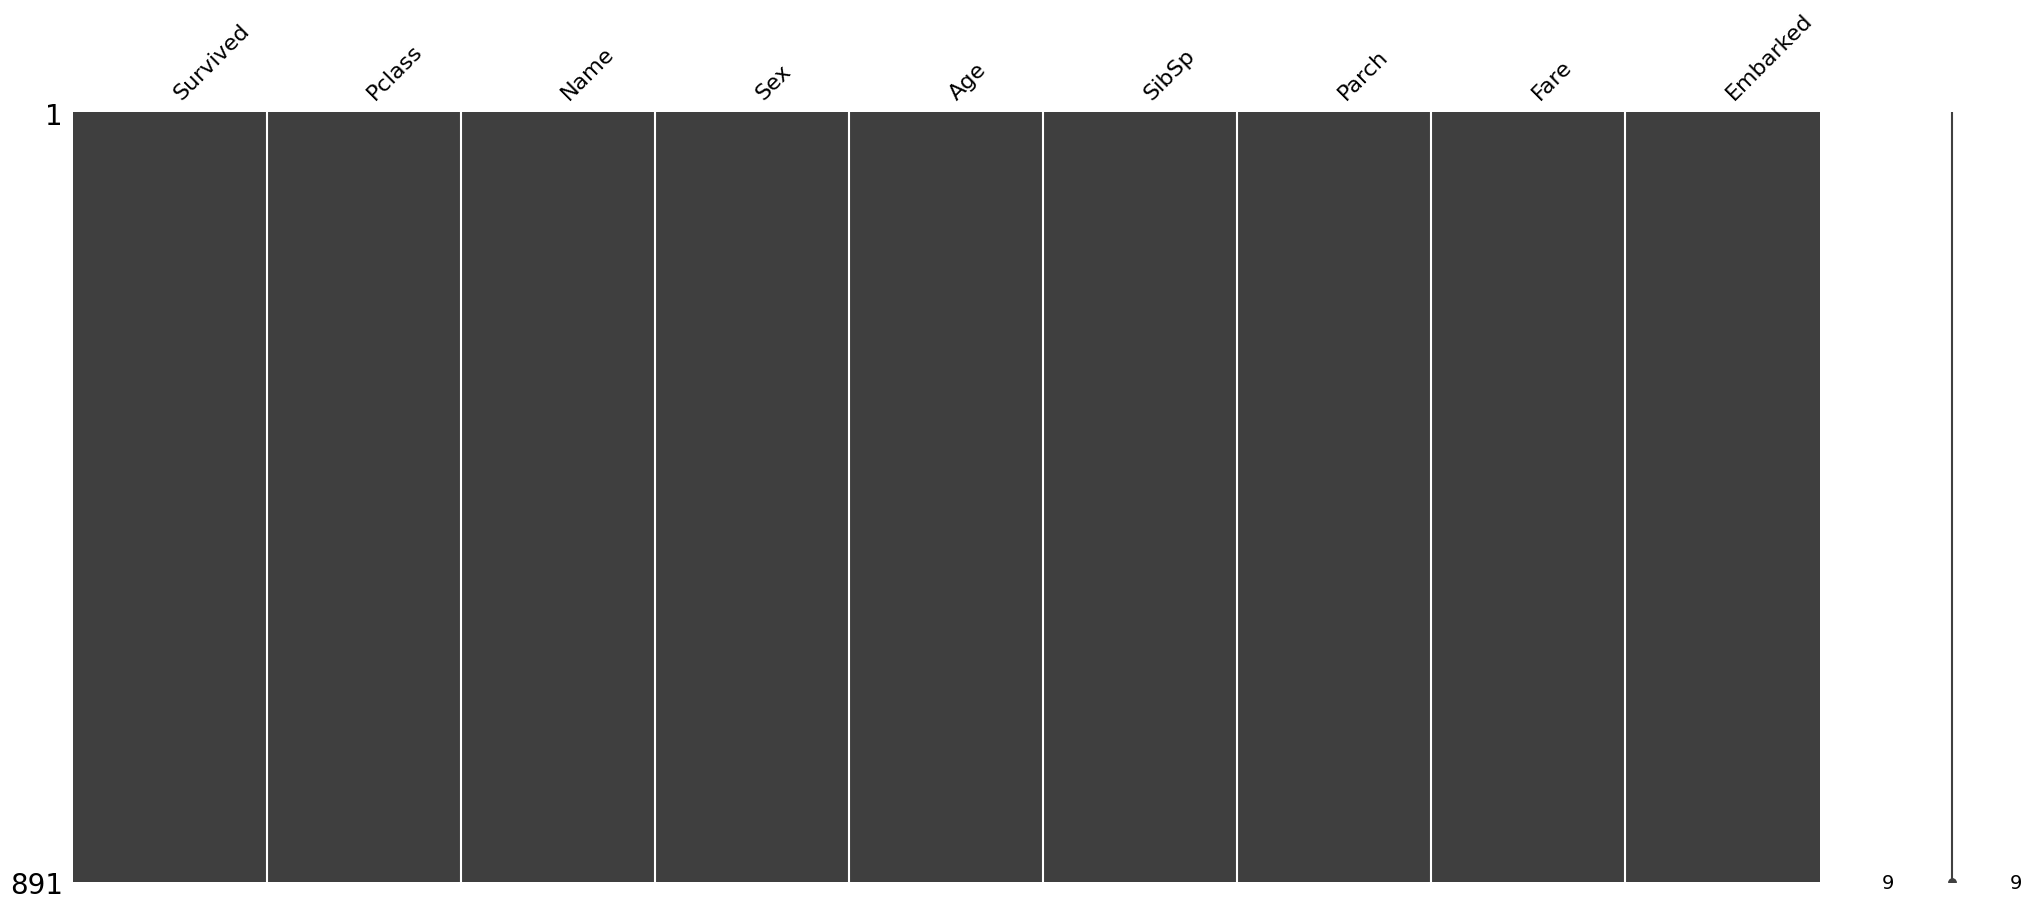

In [124]:
msno.matrix(data)

In [139]:
all_columns_names = list(data.columns)
print('All columns', all_columns_names)
not_target_columns = data.drop('Survived', axis=1)
not_target_columns_names = list(not_target_columns.columns)
print('Not target columns', not_target_columns_names)
target_column_name = ['Survived']
target_colums = data.drop(not_target_columns_names, axis=1)
print('Target columns', target_column_name)

All columns ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
Not target columns ['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
Target columns ['Survived']


In [140]:
data["Age"] = (data["Age"].astype('int8'))

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int8   
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), int8(1), object(3)
memory usage: 56.7+ KB


In [141]:
digit_columns = data.select_dtypes(include=['int64', 'int8', 'float64'])
digit_columns_names = list(digit_columns.columns)
print('Digit columns', digit_columns_names)

Digit columns ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [142]:
#Сколько уникальных значений содержит каждый столбец
dict_amount = {}
for column in all_columns_names:
  amount = data[column].nunique()
  # print(column, ': ', amount)
  dict_amount[column] = amount
sorted_dict_amount = sorted(dict_amount.items(), key=lambda x:x[1])
print(sorted_dict_amount)


[('Survived', 2), ('Sex', 2), ('Pclass', 3), ('Embarked', 3), ('SibSp', 7), ('Parch', 7), ('Age', 71), ('Fare', 248), ('Name', 891)]


In [143]:
# в столбце Имя важно семейное положение человека (miss or ms) достаем по регулярке
data['pre_name'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
data.pre_name.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: pre_name, dtype: int64

In [144]:
data['pre_name'] = data['pre_name'].replace('Mme', 'Mrs')
data['pre_name'] = data['pre_name'].replace(['Ms', 'Mlle'], 'Miss')
data['pre_name'] = data['pre_name'].replace(['Don','Master', 'Dr', 'Rev', 'Major', 'Col', 'Capt', 'Jonkheer'], 'Mr')
data['pre_name'] = data['pre_name'].replace(['Countess', 'Lady', 'Sir'], 'High')


In [145]:
data.pre_name.value_counts()

Mr      577
Miss    185
Mrs     126
High      3
Name: pre_name, dtype: int64

In [132]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,pre_name
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S,Mr


In [154]:
# из имени мы взяли самое важное, так что колонку Имя можем удалить. Остальные преобразуем в числовой вид.

int_data = data.copy()
int_data.drop('Name', axis=1, inplace=True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,pre_name
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S,Mr


In [155]:
int_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,pre_name
0,0,3,male,22,1,0,7.2500,S,Mr
1,1,1,female,38,1,0,71.2833,C,Mrs
2,1,3,female,26,0,0,7.9250,S,Miss
3,1,1,female,35,1,0,53.1000,S,Mrs
4,0,3,male,35,0,0,8.0500,S,Mr


In [156]:

dict_sex = {"male": 0, "female": 1}
int_data['Sex'] = int_data['Sex'].map(dict_sex)

dict_embarked = {"S": 0, "C": 1, "Q": 2}
int_data['Embarked'] = int_data['Embarked'].map(dict_embarked)

dict_pre_name = {"Mr": 0, "Mrs": 1, "Miss": 2, "High": 3}
int_data['pre_name'] = int_data['pre_name'].map(dict_pre_name)

int_data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,pre_name
0,0,3,0,22,1,0,7.2500,0,0
1,1,1,1,38,1,0,71.2833,1,1
2,1,3,1,26,0,0,7.9250,0,2
3,1,1,1,35,1,0,53.1000,0,1
4,0,3,0,35,0,0,8.0500,0,0


In [166]:
#возраст можно заменить первой цифрой, означающей десяток лет (обобщить)
int_data['Age'] = int_data['Age']/10
int_data['Age'] = int_data['Age'].astype("int64")

int_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,pre_name
0,0,3,0,2,1,0,7.2500,0,0
1,1,1,1,3,1,0,71.2833,1,1
2,1,3,1,2,0,0,7.9250,0,2
3,1,1,1,3,1,0,53.1000,0,1
4,0,3,0,3,0,0,8.0500,0,0


<Axes: >

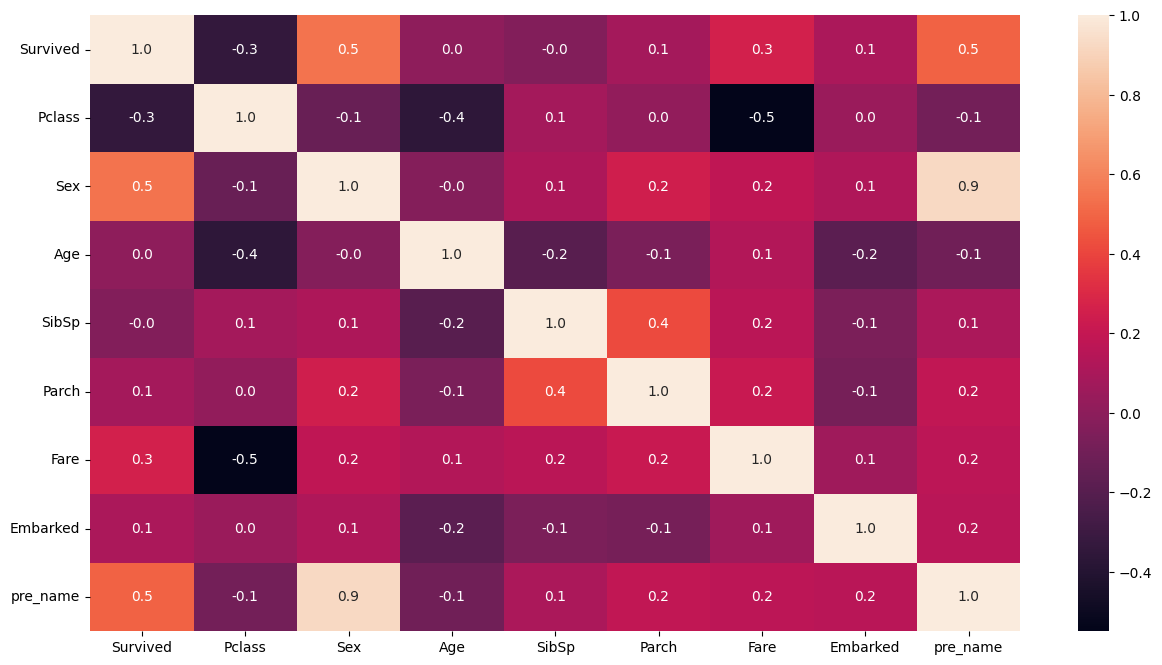

In [169]:
#посмотрим коррелирующие столбцы
import seaborn as sns
import matplotlib.pyplot as plt

correlation = int_data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(data=correlation, annot=True, fmt=".1f")

In [170]:
correlation[["Survived"]]

,Survived
Survived,1.000000
Pclass,-0.338481
Sex,0.543351
Age,0.002671
SibSp,-0.035322
Parch,0.081629
Fare,0.257307
Embarked,0.106811
pre_name,0.489851


In [171]:
int_data = int_data.drop(['Pclass'], axis = 1)


In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
from sklearn.metrics import classification_report

y_int_data = int_data["Survived"]
x_int_data = int_data.drop(["Survived"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x_int_data,y_int_data,test_size=0.2,random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print(model.coef_)
accuracy = accuracy_score(y_test, y_pred)
print("Точность модели:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Матрица ошибок", '\n', conf_matrix)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)



              precision    recall  f1-score   support

           0       0.80      0.85      0.82       105
           1       0.76      0.70      0.73        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

[[ 3.09283137 -0.02537725 -0.3169319  -0.20585146  0.01322872  0.11644068
  -0.35900552]]
Точность модели: 0.7877094972067039
Матрица ошибок 
 [[89 16]
 [22 52]]
MSE: 0.2122905027932961


In [174]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# случайный лес
params = {
          'n_estimators': [3, 10, 30],
          'max_features': [2, 4, 6, 8]
}

random_forest_model = RandomForestClassifier(random_state=42)
grid = GridSearchCV(estimator=random_forest_model, param_grid=params, scoring='accuracy', cv=5)
grid.fit(x_train, y_train)
print('Параметры:', grid.best_params_)

y_pred = grid.best_estimator_.predict(x_test)
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print('Точность модели:', accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Матрица ошибок', '\n', conf_matrix)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)



Параметры: {'max_features': 4, 'n_estimators': 10}
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Точность модели: 0.8100558659217877
Матрица ошибок 
 [[88 17]
 [17 57]]
MSE: 0.18994413407821228


Качество Random forest по наилучшим параметром схоже с Логистической регрессией. Random Forest чуть более точная.

Площадь под кривой ROC 0.7751608751608752
Площадь под кривой PR 0.7951568064943023


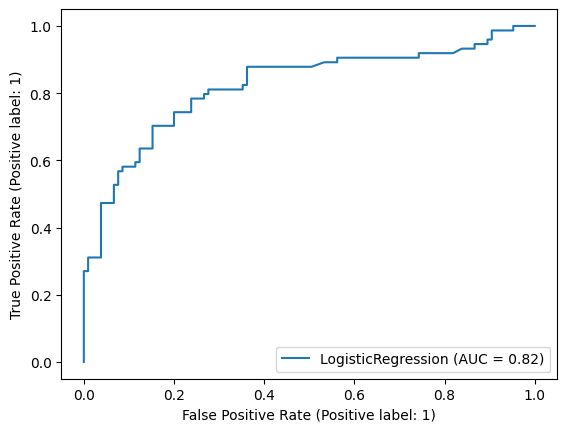

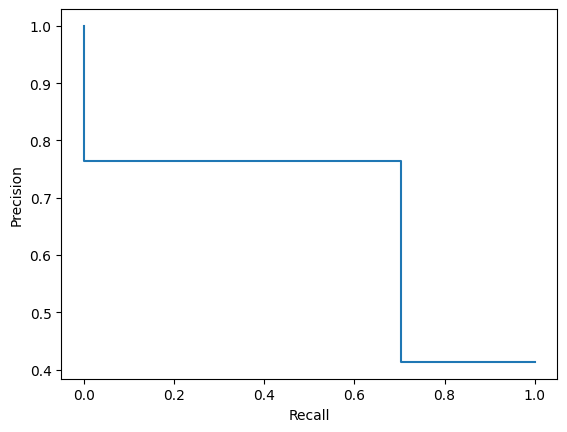

In [179]:
#ROC/PR кривые
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, PrecisionRecallDisplay,precision_recall_curve, auc

# линейная регрессия
x_train, x_test, y_train, y_test = train_test_split(x_int_data,y_int_data,test_size=0.2,random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
RocCurveDisplay.from_estimator(model, x_test, y_test)
predictions = model.predict(x_test)
s=roc_auc_score(y_test, predictions)
print(f'Площадь под кривой ROC {s}')

precision, recall, _ = precision_recall_curve(y_test, predictions)
PrecisionRecallDisplay(precision=precision, recall=recall).plot()
s = auc(recall, precision)
print(f'Площадь под кривой PR {s}')

Площадь под кривой ROC составляет 0.8041827541827542
Площадь под кривой PR 0.8177563037898233


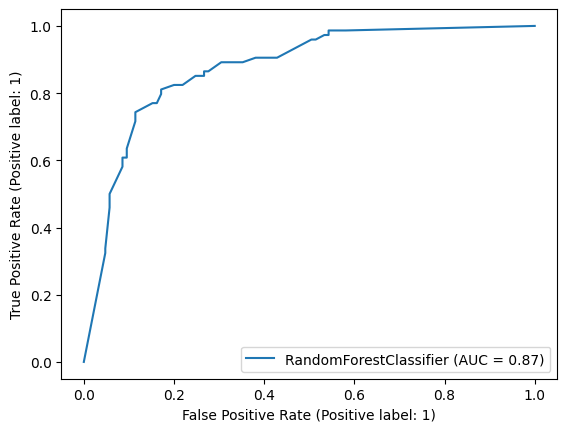

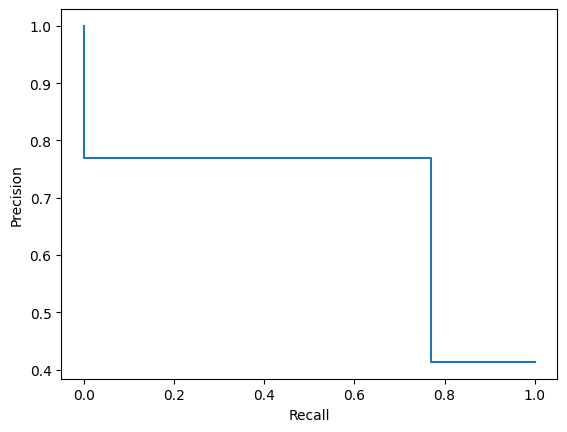

In [181]:
# random forest
RocCurveDisplay.from_estimator(grid.best_estimator_, x_test, y_test)
predictions = grid.best_estimator_.predict(x_test)
s = roc_auc_score(y_test, predictions)
print(f'Площадь под кривой ROC составляет {s}')

predictions = grid.best_estimator_.predict(x_test)
precision, recall, _ = precision_recall_curve(y_test, predictions)
PrecisionRecallDisplay(precision=precision, recall=recall).plot();
s = auc(recall, precision)
print(f'Площадь под кривой PR {s}')

Для датасета Титаник для задачи бинарной классификации (выжил ли пассажир или нет), предпочтительнее использовать метрику ROC-AUC.

ROC-AUC (Receiver Operating Characteristic - Area Under the Curve) измеряет способность модели отделять классы и дает общую оценку ее производительности без учета балансирования классов. Эта метрика особенно полезна, когда датасеты несбалансированы по классам, как это часто бывает в случае с выжившими пассажирами на Титанике.
